# Uber trips Analysis

In [1]:
import pandas as pd
import numpy as np
import time,datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [3]:
data2 = pd.read_csv('rideshare_kaggle.csv' )
data2.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
##Since there are more than 55 columns in this dataset, there are 
##many that might be useless for our simple use case. So we can just drop the extra columns and work with the rest.

extra_cols = [ 'apparentTemperature', 'precipIntensity' ,
'humidity',
'windSpeed',
'apparentTemperatureHigh',
'dewPoint',
'precipIntensityMax',
'apparentTemperatureMax',
'cloudCover',
'moonPhase',
'windGustTime',
'visibility',
'temperatureHighTime' ,
'apparentTemperatureHighTime',
'apparentTemperatureLow' ,
'apparentTemperatureLowTime',
'temperatureMinTime' ,
'temperatureMaxTime',
'apparentTemperatureMin',
'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
'windBearing' ,
'sunriseTime',
'uvIndex' ,
'visibility.1', 
'ozone',
'sunsetTime', 'uvIndexTime']

data2 = data2.drop(extra_cols, axis=1)

In [5]:
data2.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipProbability', 'windGust',
       'temperatureHigh', 'temperatureLow', 'temperatureLowTime', 'icon',
       'pressure', 'temperatureMin', 'temperatureMax'],
      dtype='object')

In [6]:
data2.sample(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,windGust,temperatureHigh,temperatureLow,temperatureLowTime,icon,pressure,temperatureMin,temperatureMax
507988,a7831e20-9941-4bf4-93cd-575d40b841b4,1.543734e+09,6,2,12,2018-12-02 06:58:05,America/New_York,Theatre District,South Station,Lyft,...,Light rain until evening.,0.00,3.29,50.37,44.79,1543816800,cloudy,1021.23,36.10,50.37
599338,14ca6d0e-a811-4826-b30b-f1a7bacb319c,1.545062e+09,15,17,12,2018-12-17 15:50:12,America/New_York,North End,Back Bay,Lyft,...,Light rain in the morning.,0.07,8.60,41.44,23.93,1545138000,cloudy,1003.27,34.14,41.44
499645,8b82983a-fd20-46d9-a420-0c6e8cd0f11a,1.543416e+09,14,28,11,2018-11-28 14:46:26,America/New_York,North Station,North End,Uber,...,Mostly cloudy throughout the day.,0.00,9.33,42.60,37.44,1543489200,partly-cloudy-day,991.71,33.75,42.60
363395,af8dc522-bb9c-4cc2-a453-5d214ecb5a0f,1.543413e+09,13,28,11,2018-11-28 13:56:08,America/New_York,North End,Beacon Hill,Uber,...,Mostly cloudy throughout the day.,0.00,5.92,42.18,36.71,1543478400,partly-cloudy-day,991.62,33.10,42.18
357603,a47056a9-a754-4692-aa69-5db4a66bc858,1.543432e+09,19,28,11,2018-11-28 19:06:26,America/New_York,North Station,Haymarket Square,Uber,...,Mostly cloudy throughout the day.,0.00,14.86,42.72,37.59,1543485600,cloudy,991.85,33.82,42.72
427650,bfda582e-bc45-4412-8204-31633086dacb,1.544685e+09,7,13,12,2018-12-13 07:15:11,America/New_York,Theatre District,North End,Uber,...,Partly cloudy throughout the day.,0.00,3.16,33.51,26.51,1544788800,clear-night,1029.29,18.11,33.51
247368,da4caecb-a89c-43ac-9a9f-9356a93124d1,1.544983e+09,17,16,12,2018-12-16 17:55:06,America/New_York,Theatre District,Haymarket Square,Uber,...,Rain throughout the day.,0.29,8.94,43.63,34.00,1545044400,cloudy,1016.68,38.49,43.63
676681,dc26497f-3529-4417-bcdb-7d00f8b9fee7,1.543592e+09,15,30,11,2018-11-30 15:27:55,America/New_York,Financial District,Boston University,Lyft,...,Mostly cloudy throughout the day.,0.00,4.24,42.64,31.57,1543658400,clear-day,1017.00,28.78,42.64
108974,8d5e944b-6e4f-44c2-b980-cc39b6ed36a5,1.545150e+09,16,18,12,2018-12-18 16:25:13,America/New_York,North Station,North End,Lyft,...,Mostly cloudy throughout the day.,0.00,22.45,32.68,20.68,1545220800,partly-cloudy-day,1010.35,23.26,38.11
241070,126b7f14-0332-448e-82f1-148037116783,1.545086e+09,22,17,12,2018-12-17 22:40:08,America/New_York,West End,Haymarket Square,Lyft,...,Light rain in the morning.,0.00,9.37,41.35,24.00,1545134400,cloudy,1000.26,34.25,41.35


In [7]:
print(data2.isnull().sum())
print(data2.isnull().sum().sum())
data2=data2.dropna()

id                        0
timestamp                 0
hour                      0
day                       0
month                     0
datetime                  0
timezone                  0
source                    0
destination               0
cab_type                  0
product_id                0
name                      0
price                 55095
distance                  0
surge_multiplier          0
latitude                  0
longitude                 0
temperature               0
short_summary             0
long_summary              0
precipProbability         0
windGust                  0
temperatureHigh           0
temperatureLow            0
temperatureLowTime        0
icon                      0
pressure                  0
temperatureMin            0
temperatureMax            0
dtype: int64
55095


## Analysis using Data Visualization

Text(0.5, 1.0, 'Number of trips Vs hours')

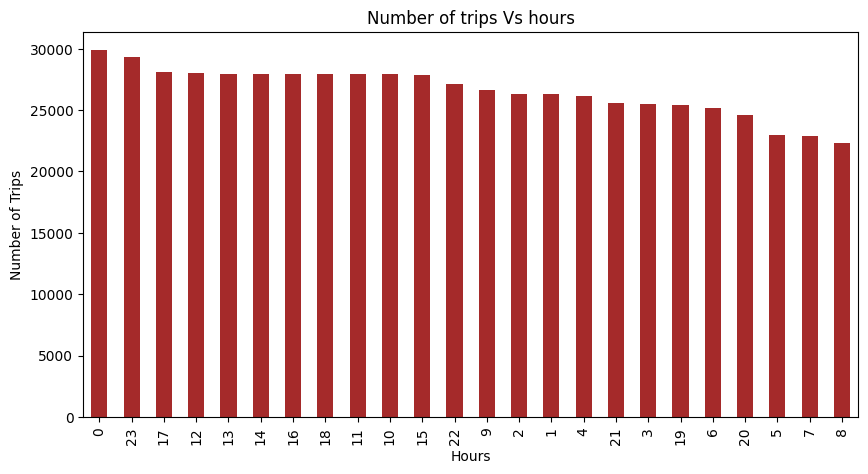

In [8]:
hours = data2['hour'].value_counts()
hours.plot(kind= 'bar', color= 'brown', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

#### As we can see, the result is very different from the travel patterns of a single person. 
#### Given Uber’s popularity, rides are almost equally frequent at all day hours (and night).
#### However, more rides are ordered towards midnight or during business hours in the afternoon.
#### To analyze the day of the week data, we need to generate the names of days from the timestamps.

In [9]:
# Assuming you have already loaded the data into 'data2'
# Convert string to datetime, handling inconsistent format
data2['datetime'] = pd.to_datetime(data2['datetime'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# Extract day of the week
day_week = data2['datetime'].dt.day_name()

# Display the modified series
print(day_week.head())


0       Sunday
1      Tuesday
2    Wednesday
3       Friday
4     Thursday
Name: datetime, dtype: object


Text(0.5, 1.0, 'Number of trips Vs days')

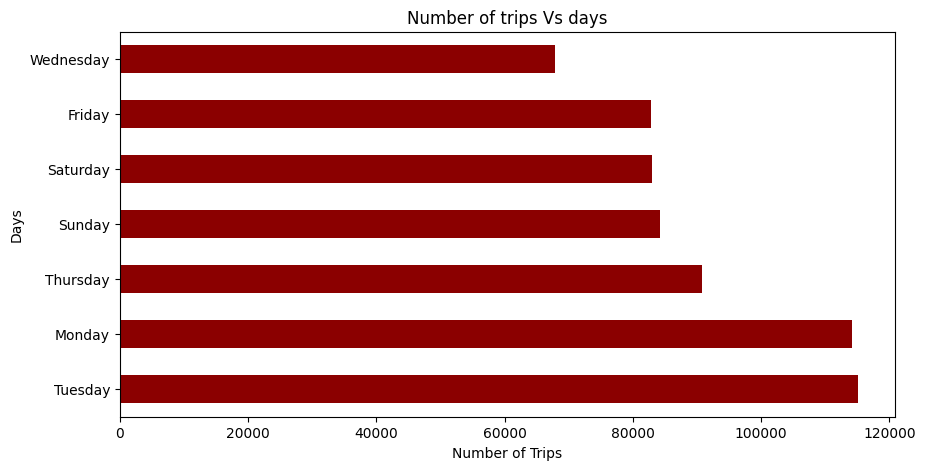

In [10]:
days = day_week.value_counts()
days.plot(kind='barh', color= 'darkred', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

#### Interestingly, more rides are ordered on the weekdays of Monday and Tuesday than on most. 
#### This might indicate active business meetings or late-night outings, as seen in the previous graph.

#### Further, as we noted in the introduction of the dataset earlier, the data only contains details of rides in Nov 
#### and December 2018. However, more rides were ordered in December similar to the personal Uber data analysis.


Text(0.5, 1.0, 'Number of trips Vs Months')

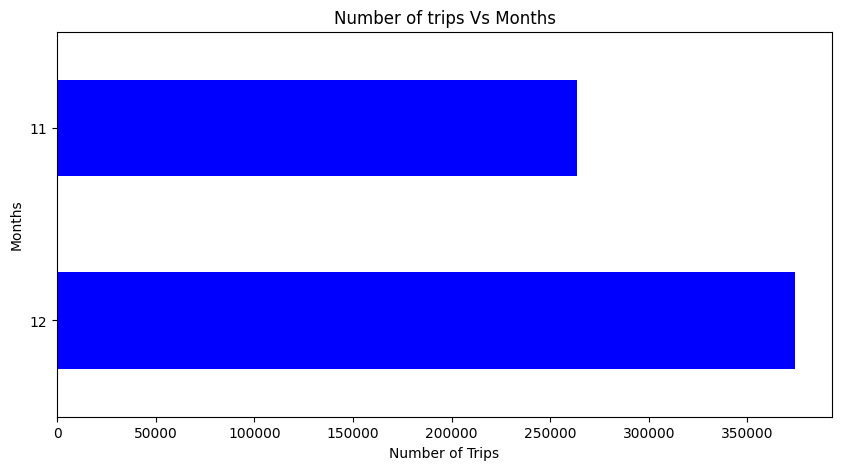

In [11]:
months = data2[ 'month' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Text(0.5, 1.0, 'Number of trips Vs days of december')

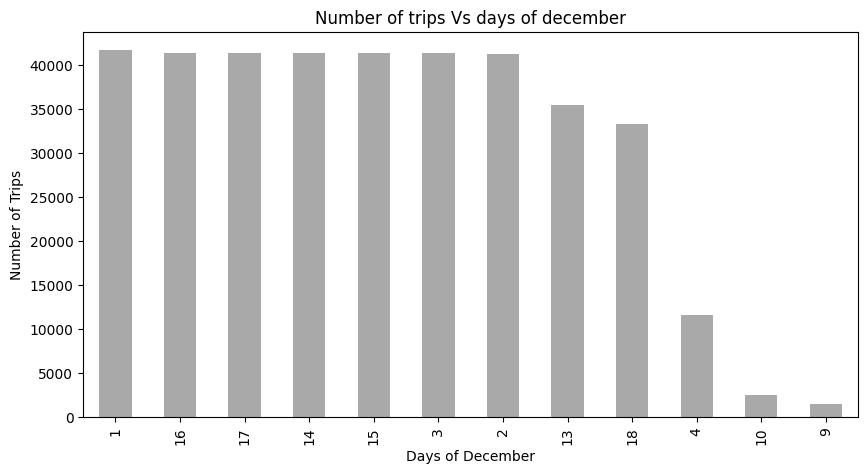

In [12]:
months = data2[ 'day' ][data2['month']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

#### Also, we note that there were no especially busy pickup or drop-off points in Boston, and most popular 
#### locations received a similar number of pick-up and drop-off requests. The Financial District 
#### (the business hub of Boston) received slightly 
#### more traffic than the rest – confirming the afternoon business meetings on Mondays and Tuesdays.

Text(0.5, 1.0, 'Number of Trips by Pickup points')

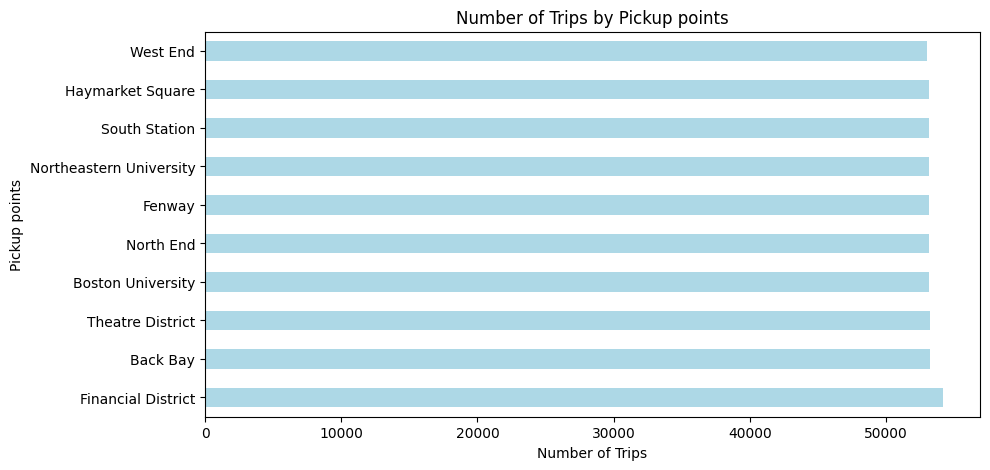

In [13]:
pic_point = data2[ 'source' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

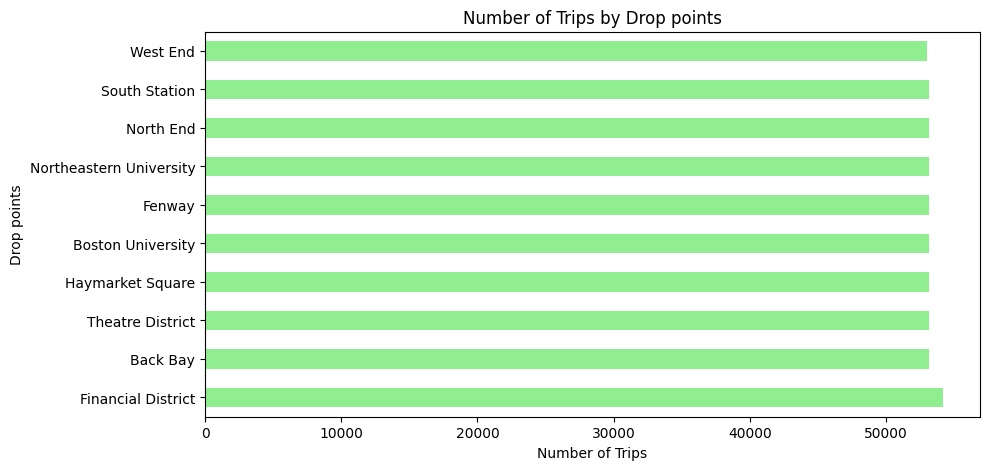

In [14]:
drop_point = data2[ 'destination' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

#### looking at the whole trip data, we find that most trips from and to the Financial District
#### have the South Station on the other end. This means that people use Uber to reach the Metro more
#### frequently than to reach their desired destination directly.

Text(0.5, 1.0, 'points - points Trips Counts')

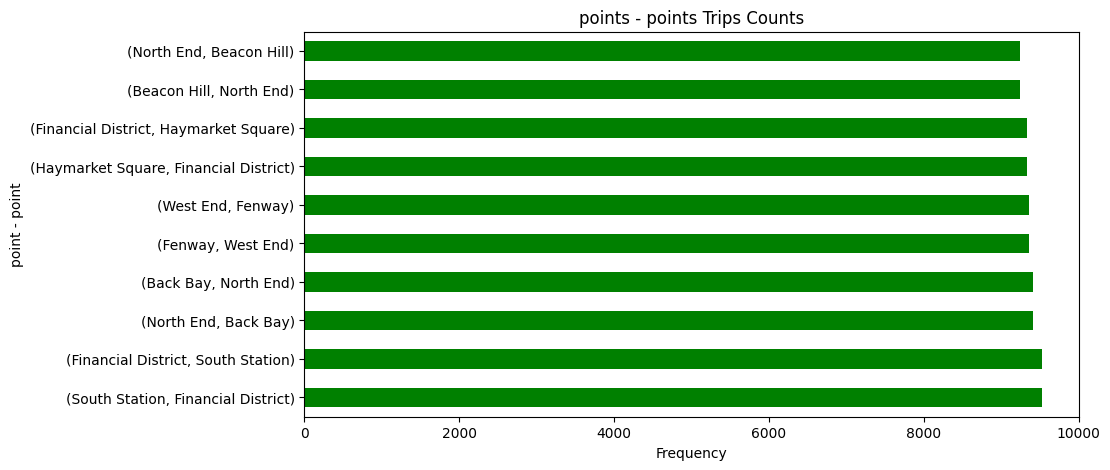

In [15]:
p_p = data2[[ 'source', 'destination'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Frequency')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

## Predictive Analysis for Uber Price Prediction using Machine Learning¶

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()#creates numerical values from catehorical values

In [16]:
data2['id'] = label_encoder.fit_transform(data2['id'])
data2['datetime'] = label_encoder.fit_transform(data2['datetime'])
data2['timezone'] = label_encoder.fit_transform(data2['timezone'])
data2['destination'] = label_encoder.fit_transform(data2['destination'])
data2['product_id'] = label_encoder.fit_transform(data2['product_id'])
data2['short_summary'] = label_encoder.fit_transform(data2['short_summary'])
data2['long_summary'] = label_encoder.fit_transform(data2['long_summary'])
data2['name'] = label_encoder.fit_transform(data2['name'])

In [17]:
print("Mapping of the car names: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Mapping of the car names: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11


##### Labels for the Pickup Point

In [18]:
data2['source'] = label_encoder.fit_transform(data2['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


##### Labels for the Current Weather 


In [17]:
data2['icon'] = label_encoder.fit_transform(data2['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [21]:
data2['cab_type'] = label_encoder.fit_transform(data2['cab_type'])

print("Class mapping of Cabe_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Cabe_type: 
0 --> 0
1 --> 1


# Since we are only predicting the prices for Uber, our dataset will contain around 385,000 samples.

In [22]:
len(data2[data2['cab_type']==1])

330568

In [23]:
x = data2[data2['cab_type']==1].drop(['price', 'cab_type'], axis=1)
y = data2[data2['cab_type']==1]['price']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

#### We see below that most rides cost between 5and20 each.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

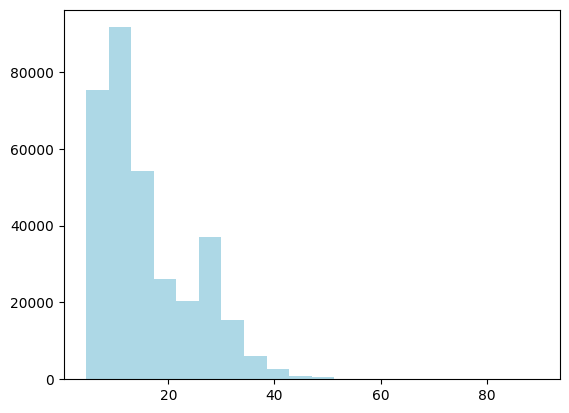

In [25]:
plt.hist(y, bins=20, color = 'lightblue')
plt.show()

In [26]:
from   sklearn.feature_selection   import   RFE
from   sklearn.linear_model   import   LinearRegression
from   sklearn.tree   import   DecisionTreeRegressor
from   sklearn.ensemble   import   RandomForestRegressor


from   sklearn   import  ensemble

#### define a function that will fit and test all these models:

In [27]:
def train_test_models(x_train, y_train, x_test, y_test):
    print("Linear Regression")
    lr_model = LinearRegression()
    lr_model = lr_model.fit(x_train,  y_train)
    print(lr_model.score(x_test,  y_test))
    
    
    print("Decision Tree")
    dt_model = DecisionTreeRegressor(random_state = 0, max_depth = 10)
    dt_model.fit(x_train,  y_train)
    print(dt_model.score(x_test,  y_test)) 
    
    
    print("Random Forest")
    rf_model = RandomForestRegressor(n_estimators = 20, random_state = 0)
    rf_model.fit(x_train,  y_train)
    print(rf_model.score(x_test,  y_test)) 
    
    return [lr_model, dt_model, rf_model]

###### Since we are working with 25 chosen features, it would be good to perform feature selection or elimination
###### to see if we can reduce the number optimally even more. Recursive feature elimination is one such method implemented
###### by scikit-learn in Python. Recursive feature elimination or RFE reduces the data complexity by iteratively removing 
###### features and checking the model performance until the optimal number of features (having 
###### performance close to the original) is left.

###### So, we also define a function that runs RFE and extracts the most important features for 
###### each type of model trained. This function takes as input the trained_model (with which we will compare
###### the performance of the reduced number of features), training and testing data, and the number of
###### features we need in the final dataset after running the RFE.

In [28]:
def feature_eliminate(trained_model, x, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select=n_features)
    rfe = rfe.fit(x, y)
    x_new = x[x.columns[rfe.support_]]
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)
    new_fit = trained_model.fit(x_train, y_train)
    print(new_fit.score(x_test, y_test))

#### check the scores on models fitted using all 25 features:

In [30]:
train_test_models(x_train, y_train, x_test, y_test)

Linear Regression
0.6524591041659735
Decision Tree
0.9485131391462979
Random Forest
0.9419807235622679


[LinearRegression(),
 DecisionTreeRegressor(max_depth=10, random_state=0),
 RandomForestRegressor(n_estimators=20, random_state=0)]

#### Desicion tree regressor model performs the best, while Linear Regression is poor at capturing the relations among features.
